<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/Assignment2/HW2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2(1)-network1-4

## Loading the CIFAR10 data set

In [0]:
import keras 
import numpy as np
from random import seed
from random import randrange
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Preprocessing

In [0]:
# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

In [0]:
#split into validation set and training set at the rate of 8:2
i = 40000
training_images = train_images[:i]
valid_images = train_images[:-i]
training_labels = train_labels[:i]
valid_labels = train_labels[:-i]

In [73]:
print(training_images.shape)
print(training_labels.shape)
print(valid_images.shape)
print(valid_labels.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


## Network1 

In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               16777728  
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total para

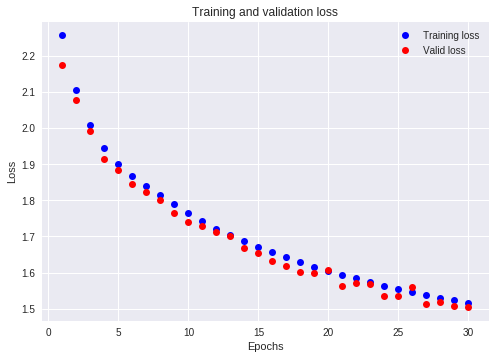

In [0]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

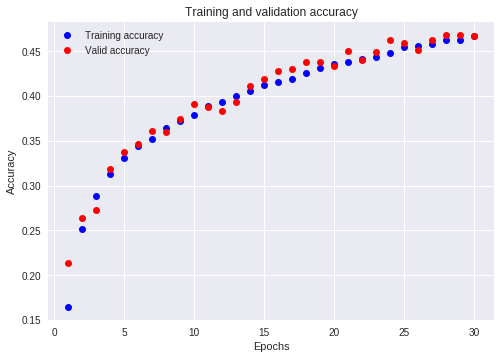

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 127us/step
Test loss: 1.5505099699020386
Test accuracy: 0.4505


## Network2

In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images.shape[1:]))
network.add(Activation('relu'))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()

#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               14746112  
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
__________

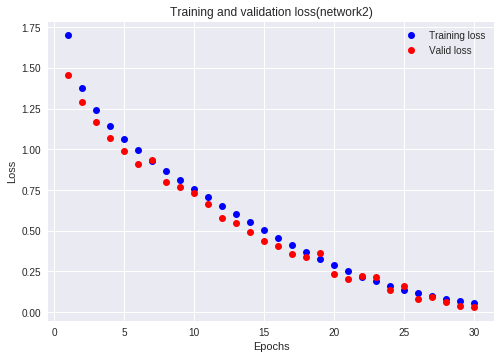

In [0]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss(network2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

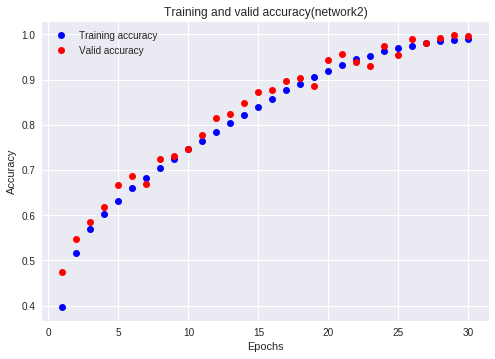

In [0]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and valid accuracy(network2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 135us/step
Test loss: 1.5735556926727294
Test accuracy: 0.6381


## Network 3: using dropout 


In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images.shape[1:]))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()

#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               14746112  
__________

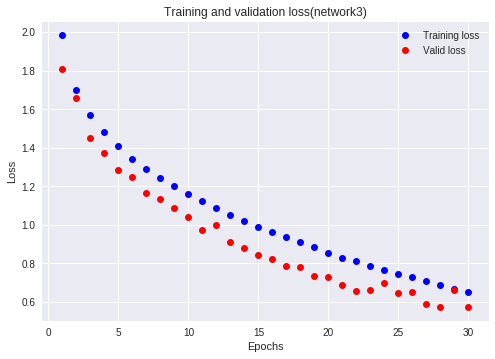

In [0]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss(network3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

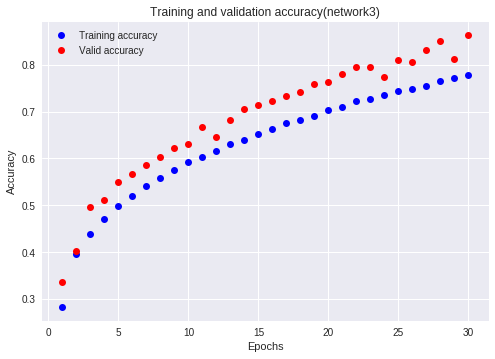

In [0]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy(network3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 166us/step
Test loss: 1.0217746564865113
Test accuracy: 0.6473


## Network4

In [74]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='valid',input_shape=training_images.shape[1:]))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Conv2D(32, (3, 3), padding='valid'))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()

#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_27 (Activation)   (None, 26, 26, 32)        0         
__________

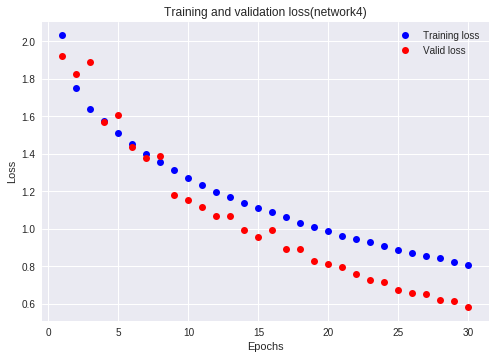

In [75]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss(network4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

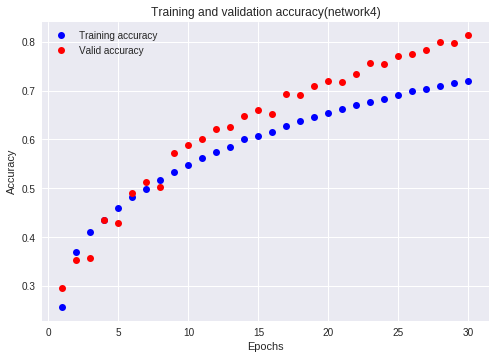

In [76]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy(network4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 146us/step
Test loss: 0.9923214212417603
Test accuracy: 0.6607


As the 4th network has the best performance, we can use all the data on this network.

In [78]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='valid',input_shape=training_images.shape[1:]))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Conv2D(32, (3, 3), padding='valid'))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Conv2D(32,(3,3)))
network.add(Activation('relu'))

network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()

#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 30
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(train_images, train_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_33 (Activation)   (None, 26, 26, 32)        0         
__________

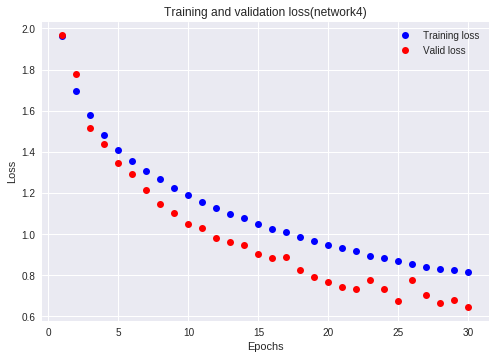

In [79]:
#display training and test loss
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss(network4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

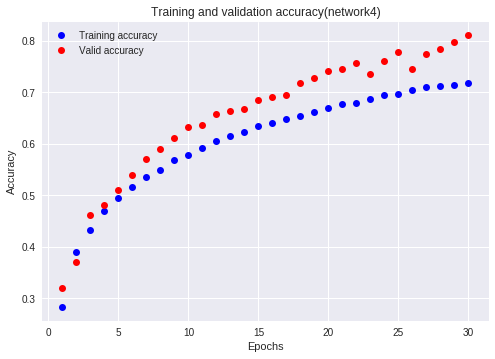

In [80]:
#display training and test accuracy
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy(network4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 144us/step
Test loss: 0.9489208515167237
Test accuracy: 0.6733
